<h1 style='color: #000080; font-size: 34px; font-weight: bold;'> Previsão Notas do ENEM 2020
</h1>


# <font color="#228B22" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #228B22;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b> Prever o desempenho dos alunos no ENEM 2020 com base nos resultados do ENEM 2019</b></i>     
</p>

---

# <font color='green' style='font-size: 30px;'>Roteiro   </font>
<hr style='border: 2px solid green;'>

<h1 style='color: black; font-size:22px; font-weight: bold;'> 1. Pré-processamento de dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'>2. Análise exploratória de dados

</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
3. Modelagem de dados
</h1>


# <font color='green' style='font-size: 30px;'>1. Pré-processamento de dados    </font>
<hr style='border: 2px solid green;'>

In [453]:
# IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [454]:
df = pd.read_csv('MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
df.head(3)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B


<hr style="border: 1px solid #228B22;">
O aviso de futuro "FutureWarning" ocorre porque a partir de uma versão futura do pandas, o valor padrão de "numeric_only" na função `corr()` será alterado para False. 

Para resolver esse aviso, você pode especificar o parâmetro `numeric_only` explicitamente como True na função `corr()`. Isso garante que apenas as colunas numéricas sejam consideradas no cálculo da correlação. 
<hr style="border: 1px solid #228B22;">


# <h1 style='color: #000080; font-size: 28px; font-weight: bold;'> Remover colunas irrelevantes para o nosso objetivo
</h1>

---

---


## Vamos remover as colunas que tem pouca correlação com nossas colunas de interesse 

---


In [455]:
# Verificando colunas de interesse

df_correlação = df.corr(numeric_only=True)
df_correlação = df_correlação[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

display(df_correlação.sort_values(by='NU_NOTA_REDACAO',axis=0, ascending=False).head(15))

colunas_de_interesse = ['NU_INSCRICAO','NU_IDADE','TP_SEXO','TP_ANO_CONCLUIU','TP_ESCOLA','IN_TREINEIRO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_REDACAO,0.504903,0.530950,0.537690,0.493200,1.000000
NU_NOTA_COMP3,0.465166,0.491154,0.497266,0.451353,0.935235
NU_NOTA_COMP2,0.411399,0.437303,0.438303,0.398999,0.892802
NU_NOTA_COMP4,0.440447,0.460272,0.464610,0.436736,0.891793
NU_NOTA_COMP1,0.430355,0.468723,0.492001,0.425793,0.851214
NU_NOTA_COMP5,0.457013,0.478832,0.479532,0.443501,0.846894
NU_NOTA_LC,0.641998,0.748844,1.000000,0.587986,0.537690
NU_NOTA_CH,0.669259,1.000000,0.748844,0.610570,0.530950
NU_NOTA_CN,1.000000,0.669259,0.641998,0.650055,0.504903
NU_NOTA_MT,0.650055,0.610570,0.587986,1.000000,0.493200


In [456]:
# FILTRANDO
df = df[colunas_de_interesse]
display(df.shape)
df.info()

(127380, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_INSCRICAO     127380 non-null  int64  
 1   NU_IDADE         127380 non-null  int64  
 2   TP_SEXO          127380 non-null  object 
 3   TP_ANO_CONCLUIU  127380 non-null  int64  
 4   TP_ESCOLA        127380 non-null  int64  
 5   IN_TREINEIRO     127380 non-null  int64  
 6   NU_NOTA_CN       92758 non-null   float64
 7   NU_NOTA_CH       98043 non-null   float64
 8   NU_NOTA_LC       98043 non-null   float64
 9   NU_NOTA_MT       92758 non-null   float64
 10  NU_NOTA_REDACAO  98043 non-null   float64
 11  NU_NOTA_COMP1    98043 non-null   float64
 12  NU_NOTA_COMP2    98043 non-null   float64
 13  NU_NOTA_COMP3    98043 non-null   float64
 14  NU_NOTA_COMP4    98043 non-null   float64
 15  NU_NOTA_COMP5    98043 non-null   float64
dtypes: float64(10), int64(5), object(1)
me


# <h1 style='color: #000080; font-size: 28px; font-weight: bold;'> Tratar dados ausentes ou inconsistentes
</h1>

---

In [457]:
# EXCLUINDO VALORES NaN

df = df.dropna()
display(df.shape)
df.info()

(92539, 16)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92539 entries, 0 to 127379
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_INSCRICAO     92539 non-null  int64  
 1   NU_IDADE         92539 non-null  int64  
 2   TP_SEXO          92539 non-null  object 
 3   TP_ANO_CONCLUIU  92539 non-null  int64  
 4   TP_ESCOLA        92539 non-null  int64  
 5   IN_TREINEIRO     92539 non-null  int64  
 6   NU_NOTA_CN       92539 non-null  float64
 7   NU_NOTA_CH       92539 non-null  float64
 8   NU_NOTA_LC       92539 non-null  float64
 9   NU_NOTA_MT       92539 non-null  float64
 10  NU_NOTA_REDACAO  92539 non-null  float64
 11  NU_NOTA_COMP1    92539 non-null  float64
 12  NU_NOTA_COMP2    92539 non-null  float64
 13  NU_NOTA_COMP3    92539 non-null  float64
 14  NU_NOTA_COMP4    92539 non-null  float64
 15  NU_NOTA_COMP5    92539 non-null  float64
dtypes: float64(10), int64(5), object(1)
memory usage: 12.0+ M

In [458]:
# VERIFICANDO DUPLICATAS

display(df[df.duplicated() == True].shape)
df.shape

(0, 16)

(92539, 16)

In [459]:
# ZEROU TODAS AS PROVAS
df.query("NU_NOTA_CN == 0 and NU_NOTA_CH == 0 and NU_NOTA_LC == 0 and NU_NOTA_MT == 0 and NU_NOTA_REDACAO == 0")
df.drop(df.query("(NU_NOTA_CN == 0) and (NU_NOTA_CH == 0) and (NU_NOTA_LC == 0) and (NU_NOTA_MT == 0) and (NU_NOTA_REDACAO == 0)").index, inplace=True)
df.shape

(92537, 16)


# <h1 style='color: #000080; font-size: 28px; font-weight: bold;'> Codificar variáveis categóricas
</h1>

---

In [460]:
mapeamento = {
    'TP_SEXO': {'M': 'Masculino', 'F': 'Feminino'},
    'TP_ANO_CONCLUIU': {0: 'Não informado', 1: 2018, 2: 2017, 3: 2016, 4: 2015, 5: 2014, 6: 2013, 7: 2012, 8: 2011, 9: 2010, 10: 2009, 11: 2008, 12: 2007, 13: 'Antes de 2007'},
    'IN_TREINEIRO': {1: 'Sim', 0: 'Não'},
    'TP_ESCOLA': {1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'}
}

for coluna, dicionario in mapeamento.items():
    df[coluna] = df[coluna].map(dicionario)
df

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,190001004661,17,Masculino,Não informado,Não Respondeu,Sim,435.6,512.3,488.6,432.4,420.0,60.0,100.0,80.0,80.0,100.0
2,190001004722,35,Feminino,2007,Não Respondeu,Não,423.2,499.1,441.0,427.2,560.0,100.0,120.0,120.0,100.0,120.0
3,190001004735,23,Feminino,2012,Não Respondeu,Não,426.2,578.1,551.5,499.9,500.0,100.0,120.0,120.0,120.0,40.0
4,190001004776,16,Feminino,Não informado,Não Respondeu,Sim,516.5,571.3,511.2,424.5,780.0,160.0,140.0,160.0,160.0,160.0
5,190001004841,18,Feminino,Não informado,Pública,Não,559.6,618.7,607.5,615.6,900.0,140.0,200.0,200.0,200.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127373,190006119987,18,Feminino,2018,Não Respondeu,Não,480.4,501.5,485.3,386.7,520.0,120.0,120.0,120.0,120.0,40.0
127375,190006120035,17,Feminino,Não informado,Pública,Não,502.4,559.6,525.7,539.7,740.0,140.0,160.0,140.0,160.0,140.0
127376,190006120036,18,Masculino,Não informado,Pública,Não,449.1,380.9,450.3,418.2,520.0,100.0,120.0,120.0,100.0,80.0
127378,190006120060,26,Feminino,2013,Não Respondeu,Não,564.7,416.2,517.3,455.7,620.0,100.0,120.0,120.0,120.0,160.0


---
# <font color='green' style='font-size: 30px;'>2. Análise exploratória de dados</font>
<hr style='border: 2px solid green;'>

---

In [461]:
display(df.query("TP_ANO_CONCLUIU == 'Não informado' and TP_ESCOLA == 'Não Respondeu'")['IN_TREINEIRO'].value_counts())
display(df['IN_TREINEIRO'].value_counts())

Sim    13163
Não     1813
Name: IN_TREINEIRO, dtype: int64

Não    79374
Sim    13163
Name: IN_TREINEIRO, dtype: int64

> # <span style="font-size: 20px;">É possível perceber que TODOS os TREINEIROS não deram informação de Ano de Conclusão e tipo de Escola, o que é razoável tendo em vista que não concluíram ainda.</span> 
---

In [462]:
display(df.query("TP_ANO_CONCLUIU == 'Não informado' and TP_ESCOLA == 'Não Respondeu' and IN_TREINEIRO == 'Não'").sort_values(by='NU_NOTA_MT', ascending=False).head(3))                                                   

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
45170,190002812883,18,Masculino,Não informado,Não Respondeu,Não,707.1,706.1,630.8,950.7,900.0,160.0,180.0,180.0,180.0,200.0
6841,190001274032,19,Masculino,Não informado,Não Respondeu,Não,656.9,663.2,595.7,895.9,700.0,120.0,160.0,120.0,160.0,140.0
103129,190005125304,21,Masculino,Não informado,Não Respondeu,Não,565.7,498.7,611.5,895.3,880.0,140.0,180.0,180.0,180.0,200.0


In [463]:
display(df.describe())
display(df.corr())

,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,9.253700e+04,92537.000000,92537.000000,92537.000000,92537.000000,92537.000000,92537.000000,92537.000000,92537.000000,92537.000000,92537.000000,92537.000000
mean,1.900035e+11,21.187946,478.037145,510.074394,522.310077,523.692599,580.092936,121.960081,124.645493,116.582556,123.326237,93.578569
std,1.447337e+06,6.999073,76.216164,81.408230,63.086752,109.320974,181.730964,31.570393,41.501155,38.786834,36.579246,58.958265
min,1.900010e+11,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.900022e+11,17.000000,418.000000,450.800000,485.500000,435.400000,500.000000,120.000000,120.000000,100.000000,100.000000,40.000000
50%,1.900035e+11,19.000000,470.300000,513.700000,527.600000,501.800000,580.000000,120.000000,120.000000,120.000000,120.000000,100.000000
75%,1.900047e+11,22.000000,533.300000,569.100000,566.500000,598.400000,680.000000,140.000000,140.000000,140.000000,140.000000,140.000000
max,1.900061e+11,75.000000,797.300000,809.400000,801.700000,985.000000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000


C:\Users\Miguel Freire\AppData\Local\Temp\ipykernel_19100\1606892535.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_INSCRICAO,1.000000,0.065139,0.013241,-0.006002,-0.002307,0.025834,-0.070427,-0.039589,-0.063126,-0.057925,-0.067671,-0.071356
NU_IDADE,0.065139,1.000000,-0.053685,-0.023375,-0.080262,-0.136590,-0.167233,-0.136892,-0.129538,-0.142582,-0.172515,-0.150157
NU_NOTA_CN,0.013241,-0.053685,1.000000,0.668979,0.641624,0.650175,0.504740,0.430084,0.411207,0.465002,0.440231,0.457005
NU_NOTA_CH,-0.006002,-0.023375,0.668979,1.000000,0.748312,0.610332,0.530676,0.467795,0.431320,0.489161,0.456315,0.476724
NU_NOTA_LC,-0.002307,-0.080262,0.641624,0.748312,1.000000,0.587710,0.542184,0.496674,0.436573,0.500009,0.464432,0.480862
NU_NOTA_MT,0.025834,-0.136590,0.650175,0.610332,0.587710,1.000000,0.493046,0.425567,0.398826,0.451198,0.436548,0.443458
NU_NOTA_REDACAO,-0.070427,-0.167233,0.504740,0.530676,0.542184,0.493046,1.000000,0.839379,0.884667,0.930396,0.883770,0.849787
NU_NOTA_COMP1,-0.039589,-0.136892,0.430084,0.467795,0.496674,0.425567,0.839379,1.000000,0.681376,0.767174,0.808866,0.565636
NU_NOTA_COMP2,-0.063126,-0.129538,0.411207,0.431320,0.436573,0.398826,0.884667,0.681376,1.000000,0.852479,0.720696,0.650145
NU_NOTA_COMP3,-0.057925,-0.142582,0.465002,0.489161,0.500009,0.451198,0.930396,0.767174,0.852479,1.000000,0.798363,0.703761


In [464]:
df.query("NU_NOTA_REDACAO == 0")

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
20,190001005274,31,Masculino,2011,Não Respondeu,Não,431.3,419.9,396.7,428.8,0.0,0.0,0.0,0.0,0.0,0.0
22,190001005335,19,Feminino,Não informado,Pública,Não,426.8,467.6,481.8,498.2,0.0,0.0,0.0,0.0,0.0,0.0
29,190001005649,30,Feminino,2007,Não Respondeu,Não,459.8,491.9,448.5,428.9,0.0,0.0,0.0,0.0,0.0,0.0
65,190001007253,17,Feminino,Não informado,Pública,Não,368.4,496.3,446.8,425.0,0.0,0.0,0.0,0.0,0.0,0.0
147,190001009842,18,Masculino,Não informado,Não Respondeu,Sim,379.8,349.9,449.1,362.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127106,190006104734,34,Feminino,2015,Não Respondeu,Não,484.9,344.4,484.9,377.7,0.0,0.0,0.0,0.0,0.0,0.0
127159,190006108067,19,Feminino,Não informado,Não Respondeu,Sim,399.8,473.9,490.6,462.4,0.0,0.0,0.0,0.0,0.0,0.0
127240,190006112478,15,Feminino,Não informado,Não Respondeu,Sim,452.7,527.5,406.7,416.0,0.0,0.0,0.0,0.0,0.0,0.0
127268,190006114139,48,Masculino,Antes de 2007,Não Respondeu,Não,432.7,355.8,419.5,398.7,0.0,0.0,0.0,0.0,0.0,0.0


<hr style="border: 1px solid #228B22;">

> # <span style="font-size: 20px;">Minha intenção é remover todas as notas 0 de redação do dataset. O motivo é que existe muitos críterios para zerar a prova de Redação que são COMPLETAMENTE diferentes das DEMAIS provas. O que faz que signifiquem coisas diferentes .</span> 

> # <span style="font-size: 20px;">A prova de redação no ENEM possui critérios de avaliação diferentes das demais provas objetivas. Enquanto as notas das provas objetivas são baseadas no número de acertos, a nota da redação é atribuída com base em critérios de correção específicos, como a estrutura textual, argumentação, coesão, coerência, entre outros.</span> 


> # <span style="font-size: 20px;">É coerente remover as notas de redação zero se pretendo usar esses dados como entrada para um modelo de regressão, uma vez que essas notas podem distorcer as relações de correlação e impactar negativamente a qualidade do modelo</span> 
<hr style="border: 1px solid #228B22;">

---

In [465]:
df = df.query("NU_NOTA_REDACAO > 0")
display(df.describe())
display(df.corr())

,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,8.997700e+04,89977.000000,89977.000000,89977.000000,89977.000000,89977.000000,89977.000000,89977.000000,89977.000000,89977.000000,89977.000000,89977.000000
mean,1.900035e+11,21.143359,479.512475,512.107116,524.152592,525.678040,596.597575,125.430054,128.191871,119.899530,126.835080,96.241039
std,1.447138e+06,6.914877,76.167207,80.561873,61.954586,109.533099,155.303146,24.285876,36.286749,33.904487,30.513307,57.608477
min,1.900010e+11,13.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,40.000000,0.000000,0.000000,0.000000
25%,1.900022e+11,17.000000,419.400000,453.600000,488.000000,437.000000,500.000000,120.000000,120.000000,100.000000,120.000000,60.000000
50%,1.900035e+11,19.000000,472.300000,515.900000,529.100000,504.400000,580.000000,120.000000,120.000000,120.000000,120.000000,100.000000
75%,1.900047e+11,22.000000,534.800000,570.500000,567.500000,601.000000,680.000000,140.000000,140.000000,140.000000,140.000000,140.000000
max,1.900061e+11,75.000000,797.300000,809.400000,801.700000,985.000000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000


C:\Users\Miguel Freire\AppData\Local\Temp\ipykernel_19100\2060530451.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_INSCRICAO,1.000000,0.064150,0.014462,-0.004559,0.000412,0.026965,-0.076469,-0.041778,-0.066629,-0.060522,-0.074463,-0.071507
NU_IDADE,0.064150,1.000000,-0.050819,-0.018457,-0.075200,-0.134041,-0.178939,-0.151942,-0.131443,-0.146995,-0.188481,-0.149199
NU_NOTA_CN,0.014462,-0.050819,1.000000,0.670575,0.642817,0.649669,0.533417,0.475323,0.415561,0.478951,0.462597,0.448970
NU_NOTA_CH,-0.004559,-0.018457,0.670575,1.000000,0.746034,0.611547,0.548429,0.501664,0.423527,0.492339,0.463621,0.464894
NU_NOTA_LC,0.000412,-0.075200,0.642817,0.746034,1.000000,0.588754,0.550176,0.522555,0.417835,0.493865,0.459443,0.465696
NU_NOTA_MT,0.026965,-0.134041,0.649669,0.611547,0.588754,1.000000,0.522580,0.474234,0.404170,0.465727,0.461833,0.435575
NU_NOTA_REDACAO,-0.076469,-0.178939,0.533417,0.548429,0.550176,0.522580,1.000000,0.764277,0.842214,0.905107,0.833267,0.869106
NU_NOTA_COMP1,-0.041778,-0.151942,0.475323,0.501664,0.522555,0.474234,0.764277,1.000000,0.537095,0.668074,0.702461,0.535238
NU_NOTA_COMP2,-0.066629,-0.131443,0.415561,0.423527,0.417835,0.404170,0.842214,0.537095,1.000000,0.801493,0.609985,0.619371
NU_NOTA_COMP3,-0.060522,-0.146995,0.478951,0.492339,0.493865,0.465727,0.905107,0.668074,0.801493,1.000000,0.719381,0.683970



# <h1 style='color: #000080; font-size: 28px; font-weight: bold;'> Distribuição dos dados em histogramas ou gráficos de densidade
</h1>

---


> <h1 style='color: #000080; font-size: 28px; font-weight: bold;'> Masculino x Feminino
</h1>

---

OBS: A função `value_counts()` é usada para contar a frequência de valores únicos em uma coluna. Ela retorna uma série com os valores únicos como índices e as contagens como valores.

Por outro lado, a função `size()` retorna o tamanho de cada grupo no objeto agrupado. Ela retorna uma série com os valores agrupados como índices e o número de ocorrências de cada valor como valores.

No contexto do código corrigido, estamos interessados em contar o número de ocorrências de cada valor único na coluna 'TP_SEXO'. Portanto, usar `size()` em vez de `value_counts()` nos permite obter o mesmo resultado, mas com uma vantagem: a função `size()` é mais eficiente computacionalmente, pois não precisa criar uma série adicional com os valores únicos.

Em resumo, ao substituir `value_counts()` por `size()` no agrupamento, estamos simplificando o código e tornando-o mais eficiente em termos de desempenho.

<BarContainer object of 2 artists>

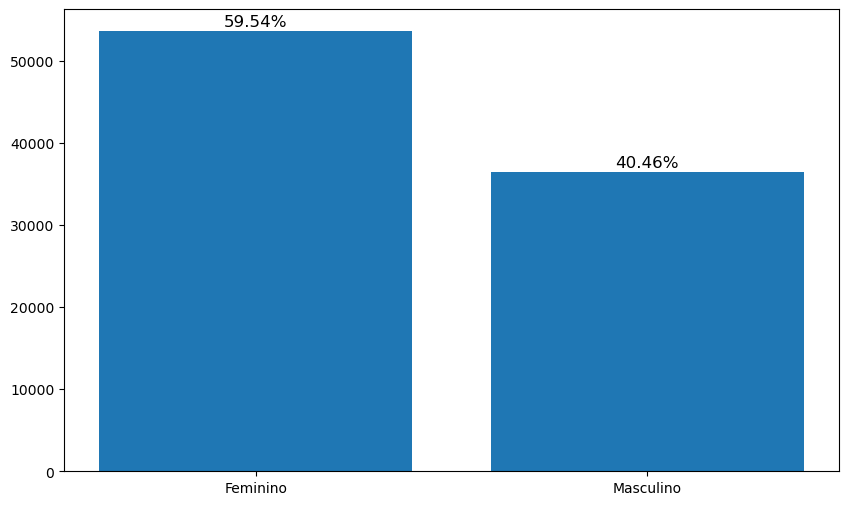

In [466]:
masc_fem = df.groupby('TP_SEXO').size().reset_index(name='Contagem')

# Calcula as porcentagens
total = masc_fem['Contagem'].sum()
masc_fem['Porcentagem'] = (masc_fem['Contagem'] / total)

plt.figure(figsize=(10,6))

# Adiciona a legenda com as porcentagens
for i in range(len(masc_fem)):
    sexo = masc_fem.loc[i, 'TP_SEXO']
    porcentagem = masc_fem.loc[i, 'Porcentagem']*100
    label = f'{porcentagem:.2f}%'
    plt.text(i, masc_fem.loc[i, 'Contagem']+550, label, ha='center', fontsize=12)
    
    
plt.bar(masc_fem['TP_SEXO'], masc_fem['Contagem'])

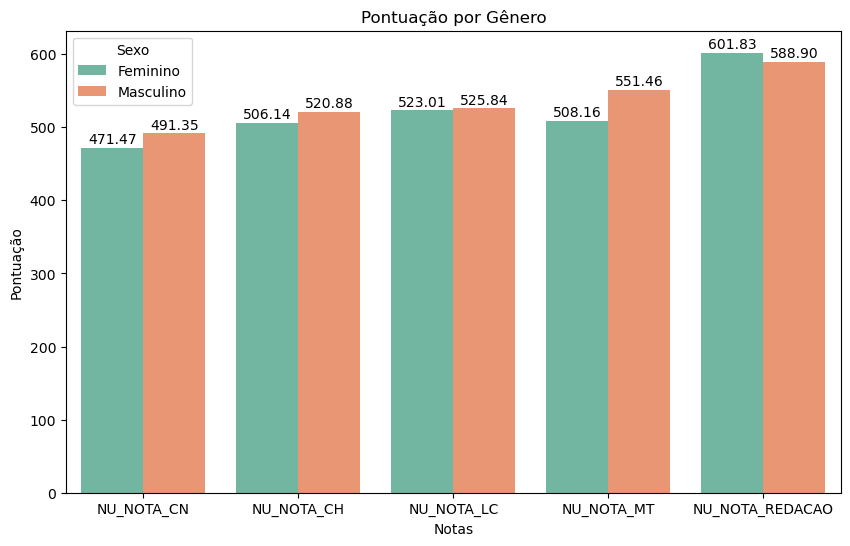

In [467]:
masc_fem_media = df.groupby('TP_SEXO')[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
masc_fem_media = masc_fem_media.reset_index()


# Transformar os dados no formato "longo"
df_long = pd.melt(masc_fem_media, id_vars='TP_SEXO', var_name='Notas', value_name='Pontuação')

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_long, x='Notas', y='Pontuação', hue='TP_SEXO', palette='Set2')

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')
    
plt.xlabel('Notas')
plt.ylabel('Pontuação')
plt.title('Pontuação por Gênero')
plt.legend(title='Sexo')

plt.show()

<hr style="border: 1px solid #228B22;">

> # <span style="font-size: 20px;">59.5% dos estudantes dessa amostra são Mulheres, 40.5% são Homens </span> 

> # <span style="font-size: 20px;">Os homens em geral possuem maiores médias em diferentes provas, exceto na Redação</span> 


<hr style="border: 1px solid #228B22;">

---


> <h1 style='color: #000080; font-size: 28px; font-weight: bold;'> Idade
</h1>

---

<BarContainer object of 62 artists>

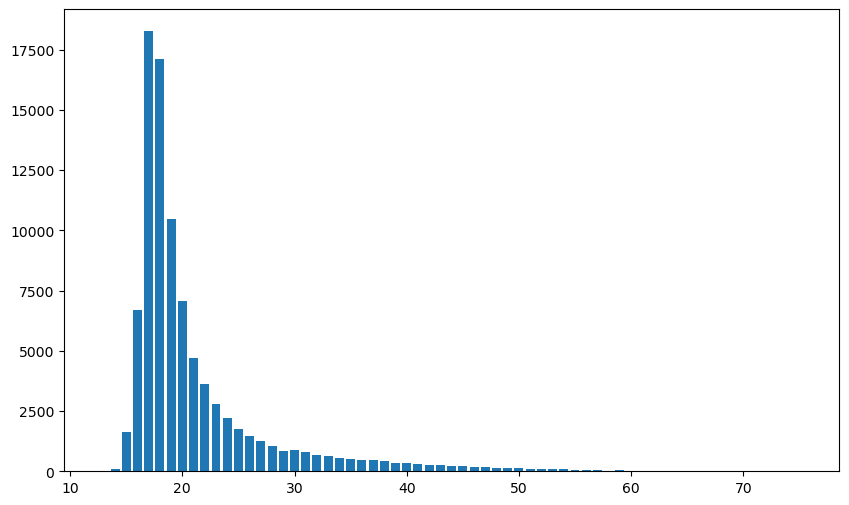

In [468]:
idade = df.groupby('NU_IDADE').size().reset_index(name='Contagem')

# Calcula as porcentagens
total = idade['Contagem'].sum()
idade['Porcentagem'] = (idade['Contagem'] / total)

plt.figure(figsize=(10,6))

# Adiciona a legenda com as porcentagens
#for i in range(len(masc_fem)):
    #sexo = masc_fem.loc[i, 'NU_IDADE']
    #porcentagem = masc_fem.loc[i, 'Porcentagem']*100
    #label = f'{porcentagem:.2f}%'
    #plt.text(i, masc_fem.loc[i, 'Contagem']+550, label, ha='center', fontsize=12)
    
    
plt.bar(idade['NU_IDADE'], idade['Contagem'])

<hr style="border: 1px solid #228B22;">

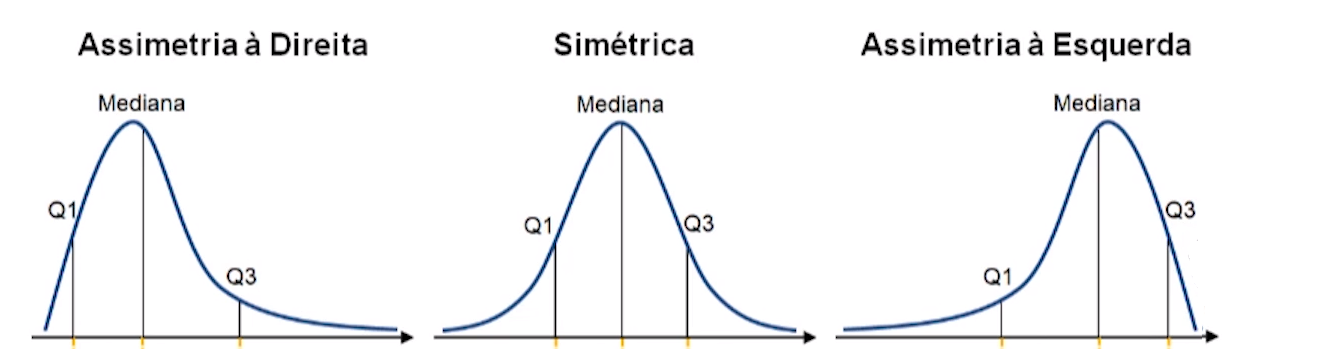

## Percebe-se que as idades do Alunos aparenta ser uma distribuição normal com assimetria à direita

<hr style="border: 1px solid #228B22;">

In [469]:
idade.sort_values(by='Contagem',axis=0,ascending=False)[0:6]['Porcentagem'].sum().round(4)*100

71.45

`` 71.45% dos inscitos possuem entre 16 - 21 anos``
---

---

---

```python
# Tipo de código para lembrar depois
for i, nota in enumerate(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']):
    plt.subplot(3, 2, i+1)
    ax = sns.barplot(data=df_long_2.query("Notas == @nota"), x='Notas', y='Pontuação', hue='NU_IDADE', palette='Set2')
    plt.title(nota)
```
---

In [533]:
idade_17_21['total'] = idade_17_21.iloc[:, 1:].sum(axis=1)/5

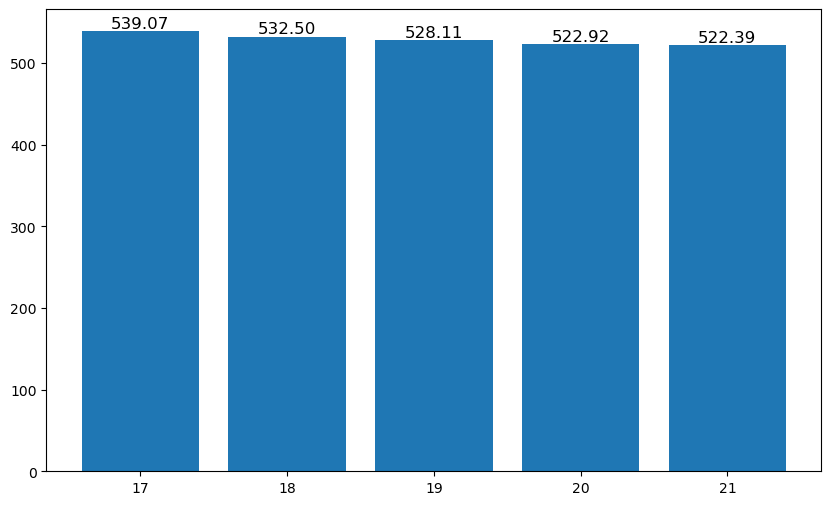

In [547]:
plt.figure(figsize=(10, 6))

# Plotagem do gráfico de barras
ax = plt.bar(idade_17_21['NU_IDADE'], idade_17_21['total'])

# Adicionar a legenda com os totais
for bar, valor in zip(ax, idade_17_21['total']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()
